In [179]:
%matplotlib notebook

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import scipy.stats as st
from scipy.stats import linregress

In [181]:
crimes_df = "Chicago_Crimes_Data.csv"

crimes_df = pd.read_csv(crimes_df, encoding="utf=8")

crimes_df

,ID,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
0,11614273,Jan-17,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
1,11622471,Jan-17,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
2,11255786,Jan-17,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,False,2017,NaN,NaN
3,11259747,Jan-17,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
4,11267468,Jan-17,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...
624511,12870310,Sep-22,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
624512,12870245,Sep-22,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
624513,12870060,Sep-22,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727
624514,12841629,Sep-22,330,ROBBERY,AGGRAVATED,False,2022,41.879408,-87.631432


In [182]:
crimes_df = crimes_df.set_index(["ID"])
crimes_df

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11614273,Jan-17,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11622471,Jan-17,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11255786,Jan-17,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,False,2017,NaN,NaN
11259747,Jan-17,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2017,NaN,NaN
11267468,Jan-17,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
12870310,Sep-22,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
12870245,Sep-22,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
12870060,Sep-22,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727


In [183]:
crimes_df = crimes_df.dropna(how='any')

In [184]:
crimes_df.count()

Date            621935
IUCR            621935
Primary Type    621935
Description     621935
Arrest          621935
Year            621935
Latitude        621935
Longitude       621935
dtype: int64

In [185]:
crimes_df

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
10824428,Jan-17,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,2017,41.808902,-87.599253
10827683,Jan-17,810,THEFT,OVER $500,False,2017,41.979006,-87.906463
10801101,Jan-17,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2017,41.759884,-87.597242
10801104,Jan-17,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2017,41.774406,-87.635727
10801111,Jan-17,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,True,2017,41.947226,-87.655523
...,...,...,...,...,...,...,...,...
12870310,Sep-22,810,THEFT,OVER $500,False,2022,41.943197,-87.680179
12870245,Sep-22,479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",False,2022,41.910007,-87.634675
12870060,Sep-22,1120,DECEPTIVE PRACTICE,FORGERY,False,2022,41.934632,-87.718727


In [186]:
crimes_2019 = crimes_df[crimes_df["Year"] == 2019]
crimes_2019

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11552667,Jan-19,890,THEFT,FROM BUILDING,False,2019,41.889453,-87.627995
11552674,Jan-19,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2019,41.726566,-87.636066
11552709,Jan-19,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2019,41.812780,-87.691894
11552758,Jan-19,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.778565,-87.665464
11553168,Jan-19,890,THEFT,FROM BUILDING,False,2019,41.898768,-87.624116
...,...,...,...,...,...,...,...,...
12006739,Dec-19,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,True,2019,41.875812,-87.750410
12007706,Dec-19,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),True,2019,41.878588,-87.745876
12006723,Dec-19,2024,NARCOTICS,POSSESS - HEROIN (WHITE),True,2019,41.860110,-87.726214


In [187]:
jan_19 = crimes_2019[crimes_2019["Date"] == "Jan-19"]
jan_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11552667,Jan-19,890,THEFT,FROM BUILDING,False,2019,41.889453,-87.627995
11552674,Jan-19,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2019,41.726566,-87.636066
11552709,Jan-19,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2019,41.812780,-87.691894
11552758,Jan-19,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.778565,-87.665464
11553168,Jan-19,890,THEFT,FROM BUILDING,False,2019,41.898768,-87.624116
...,...,...,...,...,...,...,...,...
11582234,Jan-19,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2019,41.705678,-87.600944
11582337,Jan-19,820,THEFT,$500 AND UNDER,False,2019,41.874640,-87.686256
11582186,Jan-19,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.743536,-87.570976


In [188]:
jan_19 = pd.value_counts(jan_19["Primary Type"])
jan_19

THEFT                                4359
BATTERY                              3431
CRIMINAL DAMAGE                      1768
ASSAULT                              1391
OTHER OFFENSE                        1384
DECEPTIVE PRACTICE                   1367
NARCOTICS                            1155
BURGLARY                              782
MOTOR VEHICLE THEFT                   684
ROBBERY                               636
CRIMINAL TRESPASS                     554
WEAPONS VIOLATION                     443
OFFENSE INVOLVING CHILDREN            135
CRIM SEXUAL ASSAULT                    94
INTERFERENCE WITH PUBLIC OFFICER       93
PUBLIC PEACE VIOLATION                 85
SEX OFFENSE                            70
PROSTITUTION                           64
ARSON                                  22
LIQUOR LAW VIOLATION                   21
INTIMIDATION                           20
STALKING                               19
CONCEALED CARRY LICENSE VIOLATION      11
CRIMINAL SEXUAL ASSAULT           

In [189]:
feb_19 = crimes_2019[crimes_2019["Date"] == "Feb-19"]
feb_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11582353,Feb-19,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.694923,-87.682532
11582378,Feb-19,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2019,41.780039,-87.701947
11582722,Feb-19,1242,DECEPTIVE PRACTICE,COMPUTER FRAUD,False,2019,41.753367,-87.642893
11583385,Feb-19,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2019,41.726152,-87.643338
11589577,Feb-19,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,2019,41.901757,-87.718965
...,...,...,...,...,...,...,...,...
11609981,Feb-19,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2019,41.899820,-87.691876
11609949,Feb-19,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,True,2019,41.700687,-87.631435
11609976,Feb-19,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,True,2019,41.817985,-87.603445


In [190]:
feb_19 = pd.value_counts(feb_19["Primary Type"])
feb_19

THEFT                                4208
BATTERY                              3256
CRIMINAL DAMAGE                      1696
ASSAULT                              1380
OTHER OFFENSE                        1366
DECEPTIVE PRACTICE                   1221
NARCOTICS                            1111
BURGLARY                              661
MOTOR VEHICLE THEFT                   643
CRIMINAL TRESPASS                     494
ROBBERY                               487
WEAPONS VIOLATION                     369
OFFENSE INVOLVING CHILDREN            166
INTERFERENCE WITH PUBLIC OFFICER      110
PUBLIC PEACE VIOLATION                109
SEX OFFENSE                            88
CRIM SEXUAL ASSAULT                    67
PROSTITUTION                           37
ARSON                                  29
STALKING                               21
KIDNAPPING                             14
CONCEALED CARRY LICENSE VIOLATION      12
INTIMIDATION                           10
LIQUOR LAW VIOLATION              

In [191]:
mar_19 = crimes_2019[crimes_2019["Date"] == "Mar-19"]
mar_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11610091,Mar-19,820,THEFT,$500 AND UNDER,False,2019,41.873441,-87.726029
11610331,Mar-19,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2019,41.911610,-87.679366
11610435,Mar-19,320,ROBBERY,STRONGARM - NO WEAPON,False,2019,41.748804,-87.611228
11610928,Mar-19,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2019,41.747393,-87.585439
11612018,Mar-19,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,False,2019,41.752990,-87.671999
...,...,...,...,...,...,...,...,...
11640816,Mar-19,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,2019,41.963654,-87.651055
11640896,Mar-19,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.728255,-87.643400
11640852,Mar-19,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2019,41.736665,-87.552801


In [192]:
mar_19 = pd.value_counts(mar_19["Primary Type"])
mar_19

THEFT                                4308
BATTERY                              3945
CRIMINAL DAMAGE                      1996
ASSAULT                              1610
OTHER OFFENSE                        1388
DECEPTIVE PRACTICE                   1336
NARCOTICS                            1288
MOTOR VEHICLE THEFT                   708
BURGLARY                              660
CRIMINAL TRESPASS                     511
ROBBERY                               496
WEAPONS VIOLATION                     493
OFFENSE INVOLVING CHILDREN            174
PUBLIC PEACE VIOLATION                139
INTERFERENCE WITH PUBLIC OFFICER       99
SEX OFFENSE                            91
CRIM SEXUAL ASSAULT                    60
PROSTITUTION                           47
ARSON                                  24
STALKING                               22
KIDNAPPING                             18
LIQUOR LAW VIOLATION                   17
CONCEALED CARRY LICENSE VIOLATION      14
INTIMIDATION                      

In [193]:
apr_19 = crimes_2019[crimes_2019["Date"] == "Apr-19"]
apr_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11640864,Apr-19,1310,CRIMINAL DAMAGE,TO PROPERTY,True,2019,41.877865,-87.627667
11640906,Apr-19,810,THEFT,OVER $500,False,2019,41.746797,-87.657617
11641010,Apr-19,1320,CRIMINAL DAMAGE,TO VEHICLE,False,2019,41.876957,-87.736112
11641320,Apr-19,820,THEFT,$500 AND UNDER,False,2019,41.746634,-87.613591
11643802,Apr-19,820,THEFT,$500 AND UNDER,False,2019,41.885703,-87.748311
...,...,...,...,...,...,...,...,...
11674915,Apr-19,890,THEFT,FROM BUILDING,False,2019,41.929012,-87.712218
11672232,Apr-19,486,BATTERY,DOMESTIC BATTERY SIMPLE,True,2019,41.753792,-87.640458
11672224,Apr-19,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.911125,-87.637933


In [194]:
apr_19 = pd.value_counts(apr_19["Primary Type"])
apr_19

THEFT                                4322
BATTERY                              3795
CRIMINAL DAMAGE                      2209
ASSAULT                              1649
OTHER OFFENSE                        1354
DECEPTIVE PRACTICE                   1219
NARCOTICS                            1096
MOTOR VEHICLE THEFT                   734
BURGLARY                              664
ROBBERY                               573
CRIMINAL TRESPASS                     550
WEAPONS VIOLATION                     511
OFFENSE INVOLVING CHILDREN            198
PUBLIC PEACE VIOLATION                152
INTERFERENCE WITH PUBLIC OFFICER      109
SEX OFFENSE                            61
CRIM SEXUAL ASSAULT                    61
PROSTITUTION                           43
ARSON                                  26
CONCEALED CARRY LICENSE VIOLATION      19
INTIMIDATION                           17
KIDNAPPING                             13
LIQUOR LAW VIOLATION                   10
STALKING                          

In [195]:
may_19 = crimes_2019[crimes_2019["Date"] == "May-19"]
may_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11672527,May-19,820,THEFT,$500 AND UNDER,False,2019,41.885879,-87.630979
11674789,May-19,460,BATTERY,SIMPLE,False,2019,41.870764,-87.721645
11675923,May-19,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,False,2019,41.769168,-87.566531
11683044,May-19,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2019,41.806950,-87.619529
12136552,May-19,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,False,2019,41.704603,-87.613697
...,...,...,...,...,...,...,...,...
11870934,May-19,820,THEFT,$500 AND UNDER,False,2019,41.938747,-87.640470
11705879,May-19,460,BATTERY,SIMPLE,False,2019,41.872894,-87.627560
11709333,May-19,810,THEFT,OVER $500,False,2019,41.786457,-87.690451


In [196]:
may_19 = pd.value_counts(may_19["Primary Type"])
may_19

THEFT                                2870
BATTERY                              2733
CRIMINAL DAMAGE                      1439
ASSAULT                              1166
OTHER OFFENSE                         818
NARCOTICS                             683
DECEPTIVE PRACTICE                    598
MOTOR VEHICLE THEFT                   422
BURGLARY                              412
CRIMINAL TRESPASS                     376
WEAPONS VIOLATION                     361
ROBBERY                               350
INTERFERENCE WITH PUBLIC OFFICER       98
OFFENSE INVOLVING CHILDREN             96
PUBLIC PEACE VIOLATION                 89
SEX OFFENSE                            41
CRIM SEXUAL ASSAULT                    30
PROSTITUTION                           23
ARSON                                  16
KIDNAPPING                             14
CONCEALED CARRY LICENSE VIOLATION      13
GAMBLING                                8
INTIMIDATION                            7
STALKING                          

In [197]:
jun_19 = crimes_2019[crimes_2019["Date"] == "Jun-19"]
jun_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11868109,Jun-19,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2019,41.890988,-87.621022
11864103,Jun-19,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,False,2019,41.929025,-87.756331
11708013,Jun-19,560,ASSAULT,SIMPLE,False,2019,41.886996,-87.639913
11866595,Jun-19,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,2019,41.949116,-87.646273
11713826,Jun-19,820,THEFT,$500 AND UNDER,False,2019,41.743954,-87.557608
11709960,Jun-19,2022,NARCOTICS,POSS: COCAINE,True,2019,41.847898,-87.725188
11711294,Jun-19,041A,BATTERY,AGGRAVATED - HANDGUN,False,2019,41.911709,-87.761855
11711506,Jun-19,460,BATTERY,SIMPLE,True,2019,41.865288,-87.727590
11869806,Jun-19,1120,DECEPTIVE PRACTICE,FORGERY,False,2019,41.767380,-87.577560


In [198]:
jun_19 = pd.value_counts(jun_19["Primary Type"])
jun_19

DECEPTIVE PRACTICE            14
BATTERY                       13
THEFT                         11
ASSAULT                        4
BURGLARY                       3
OTHER OFFENSE                  3
NARCOTICS                      3
CRIMINAL DAMAGE                2
CRIM SEXUAL ASSAULT            1
OFFENSE INVOLVING CHILDREN     1
ROBBERY                        1
WEAPONS VIOLATION              1
MOTOR VEHICLE THEFT            1
SEX OFFENSE                    1
Name: Primary Type, dtype: int64

In [199]:
jul_19 = crimes_2019[crimes_2019["Date"] == "Jul-19"]
jul_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11871277,Jul-19,810,THEFT,OVER $500,False,2019,41.789467,-87.675394
12018582,Jul-19,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2019,41.870242,-87.687369
12184982,Jul-19,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,2019,41.812833,-87.709064
11869874,Jul-19,890,THEFT,FROM BUILDING,False,2019,41.796969,-87.792929
11744825,Jul-19,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,False,2019,41.794510,-87.633302
11868573,Jul-19,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,False,2019,41.851714,-87.667511
11751339,Jul-19,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,False,2019,41.932787,-87.711097
11748025,Jul-19,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,False,2019,41.678682,-87.660208
11746485,Jul-19,041A,BATTERY,AGGRAVATED - HANDGUN,False,2019,41.890108,-87.703270


In [200]:
jul_19 = pd.value_counts(jul_19["Primary Type"])
jul_19

DECEPTIVE PRACTICE            17
BATTERY                        8
THEFT                          4
OTHER OFFENSE                  3
BURGLARY                       2
CRIM SEXUAL ASSAULT            2
OFFENSE INVOLVING CHILDREN     2
WEAPONS VIOLATION              2
ASSAULT                        1
ROBBERY                        1
NARCOTICS                      1
MOTOR VEHICLE THEFT            1
SEX OFFENSE                    1
CRIMINAL DAMAGE                1
LIQUOR LAW VIOLATION           1
Name: Primary Type, dtype: int64

In [201]:
aug_19 = crimes_2019[crimes_2019["Date"] == "Aug-19"]
aug_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
12015137,Aug-19,890,THEFT,FROM BUILDING,False,2019,41.933917,-87.694437
12019972,Aug-19,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,False,2019,41.798202,-87.739231
12018585,Aug-19,1195,DECEPTIVE PRACTICE,FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABL...,False,2019,41.876670,-87.754026
11867567,Aug-19,610,BURGLARY,FORCIBLE ENTRY,False,2019,41.798929,-87.675774
12135700,Aug-19,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2019,41.863761,-87.710463
...,...,...,...,...,...,...,...,...
11865615,Aug-19,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,False,2019,41.750290,-87.613689
11868846,Aug-19,910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,2019,41.836325,-87.678129
11812338,Aug-19,810,THEFT,OVER $500,False,2019,41.896943,-87.666182


In [202]:
aug_19 = pd.value_counts(aug_19["Primary Type"])
aug_19

DECEPTIVE PRACTICE            22
THEFT                         13
OTHER OFFENSE                  8
BATTERY                        6
MOTOR VEHICLE THEFT            5
ASSAULT                        4
OFFENSE INVOLVING CHILDREN     3
BURGLARY                       1
CRIM SEXUAL ASSAULT            1
HOMICIDE                       1
CRIMINAL DAMAGE                1
LIQUOR LAW VIOLATION           1
ARSON                          1
CRIMINAL SEXUAL ASSAULT        1
Name: Primary Type, dtype: int64

In [203]:
sep_19 = crimes_2019[crimes_2019["Date"] == "Sep-19"]
sep_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11874757,Sep-19,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,2019,41.880687,-87.654670
11871772,Sep-19,870,THEFT,POCKET-PICKING,False,2019,41.751703,-87.663470
11867565,Sep-19,610,BURGLARY,FORCIBLE ENTRY,False,2019,41.872819,-87.701824
11875645,Sep-19,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,2019,41.845557,-87.711161
11814649,Sep-19,810,THEFT,OVER $500,True,2019,41.945353,-87.697992
...,...,...,...,...,...,...,...,...
11869047,Sep-19,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,False,2019,41.944515,-87.650443
11873311,Sep-19,810,THEFT,OVER $500,False,2019,41.694520,-87.711967
11871433,Sep-19,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,2019,41.889453,-87.627995


In [204]:
sep_19 = pd.value_counts(sep_19["Primary Type"])
sep_19

DECEPTIVE PRACTICE            54
THEFT                         31
OTHER OFFENSE                 19
BATTERY                        7
BURGLARY                       6
MOTOR VEHICLE THEFT            5
CRIMINAL DAMAGE                5
ASSAULT                        4
ROBBERY                        4
OFFENSE INVOLVING CHILDREN     3
CRIM SEXUAL ASSAULT            3
STALKING                       1
CRIMINAL SEXUAL ASSAULT        1
Name: Primary Type, dtype: int64

In [205]:
oct_19 = crimes_2019[crimes_2019["Date"] == "Oct-19"]
oct_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11873019,Oct-19,810,THEFT,OVER $500,False,2019,41.836070,-87.613033
12136729,Oct-19,1310,CRIMINAL DAMAGE,TO PROPERTY,False,2019,41.898539,-87.698019
11871860,Oct-19,890,THEFT,FROM BUILDING,False,2019,41.743516,-87.553817
11865386,Oct-19,820,THEFT,$500 AND UNDER,False,2019,41.727313,-87.678611
11869779,Oct-19,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,False,2019,41.958474,-87.650878
...,...,...,...,...,...,...,...,...
11871543,Oct-19,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,True,2019,41.663403,-87.625794
11871750,Oct-19,810,THEFT,OVER $500,False,2019,41.779685,-87.701940
11871574,Oct-19,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,True,2019,41.876922,-87.738914


In [206]:
oct_19 = pd.value_counts(oct_19["Primary Type"])
oct_19

THEFT                                1960
BATTERY                              1400
CRIMINAL DAMAGE                       902
ASSAULT                               618
OTHER OFFENSE                         509
DECEPTIVE PRACTICE                    437
NARCOTICS                             387
BURGLARY                              288
MOTOR VEHICLE THEFT                   251
ROBBERY                               247
CRIMINAL TRESPASS                     199
WEAPONS VIOLATION                     188
OFFENSE INVOLVING CHILDREN             52
PUBLIC PEACE VIOLATION                 52
INTERFERENCE WITH PUBLIC OFFICER       42
SEX OFFENSE                            29
CRIM SEXUAL ASSAULT                    20
PROSTITUTION                           14
ARSON                                  10
LIQUOR LAW VIOLATION                    7
CRIMINAL SEXUAL ASSAULT                 6
CONCEALED CARRY LICENSE VIOLATION       6
GAMBLING                                5
STALKING                          

In [207]:
nov_19 = crimes_2019[crimes_2019["Date"] == "Nov-19"]
nov_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
11879080,Nov-19,041A,BATTERY,AGGRAVATED - HANDGUN,False,2019,41.751394,-87.594752
11879526,Nov-19,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,False,2019,41.917758,-87.687415
11884389,Nov-19,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,False,2019,41.691869,-87.643584
11881689,Nov-19,5121,OTHER OFFENSE,ARSONIST - ANNUAL REGISTRATION,True,2019,41.801498,-87.625879
11882981,Nov-19,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,2019,41.881524,-87.662707
11883091,Nov-19,810,THEFT,OVER $500,False,2019,41.930049,-87.685921
12007716,Nov-19,2027,NARCOTICS,POSSESS - CRACK,True,2019,41.739516,-87.589121
11886300,Nov-19,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,False,2019,41.922461,-87.775667
11896161,Nov-19,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,True,2019,41.895513,-87.710743


In [208]:
nov_19 = pd.value_counts(nov_19["Primary Type"])
nov_19

NARCOTICS                     6
ROBBERY                       3
CRIMINAL SEXUAL ASSAULT       3
OTHER OFFENSE                 2
OFFENSE INVOLVING CHILDREN    2
BATTERY                       1
DECEPTIVE PRACTICE            1
THEFT                         1
CRIMINAL DAMAGE               1
Name: Primary Type, dtype: int64

In [209]:
dec_19 = crimes_2019[crimes_2019["Date"] == "Dec-19"]
dec_19

,Date,IUCR,Primary Type,Description,Arrest,Year,Latitude,Longitude
ID,,,,,,,,
12018884,Dec-19,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,False,2019,41.796178,-87.717114
12017402,Dec-19,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,2019,41.949086,-87.729146
12007784,Dec-19,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,True,2019,41.899050,-87.722907
12006802,Dec-19,2022,NARCOTICS,POSSESS - COCAINE,True,2019,41.868181,-87.709271
12018007,Dec-19,930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,False,2019,41.683455,-87.616766
11974266,Dec-19,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,True,2019,41.900892,-87.720494
11971804,Dec-19,1210,DECEPTIVE PRACTICE,THEFT OF LABOR / SERVICES,False,2019,41.998372,-87.660569
11974262,Dec-19,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),True,2019,41.867102,-87.723501
11974261,Dec-19,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),True,2019,41.858448,-87.713973


In [210]:
dec_19 = pd.value_counts(dec_19["Primary Type"])
dec_19

NARCOTICS                     13
BATTERY                        4
DECEPTIVE PRACTICE             4
OTHER OFFENSE                  3
MOTOR VEHICLE THEFT            1
BURGLARY                       1
CRIMINAL SEXUAL ASSAULT        1
OFFENSE INVOLVING CHILDREN     1
Name: Primary Type, dtype: int64

In [211]:
crime_temp = pd.DataFrame({
    "Year": [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
    "Temperature": [21, 25.9, 34.2, 49.7, 58, 67.8, 77.1, 72.9, 69.4, 50.9, 34.8, 34],
    "Theft": [4359, 4208, 4308, 4322, 2870, 14, 17, 22, 54, 1960 ,6, 13],
    "Battery Crimes": [3431, 3256, 3945, 3795, 2733, 13, 8, 13, 31, 1400, 3 ,4],
    "Criminal Damage": [1768, 1696, 1996, 2209, 1166, 11, 4, 8, 19, 902, 3, 4]
})

crime_temp

,Year,Temperature,Theft,Battery Crimes,Criminal Damage
0,2019,21.0,4359,3431,1768
1,2019,25.9,4208,3256,1696
2,2019,34.2,4308,3945,1996
3,2019,49.7,4322,3795,2209
4,2019,58.0,2870,2733,1166
5,2019,67.8,14,13,11
6,2019,77.1,17,8,4
7,2019,72.9,22,13,8
8,2019,69.4,54,31,19
9,2019,50.9,1960,1400,902


In [212]:
crime_temp = crime_temp.set_index(["Year"])
crime_temp

,Temperature,Theft,Battery Crimes,Criminal Damage
Year,,,,
2019,21.0,4359,3431,1768
2019,25.9,4208,3256,1696
2019,34.2,4308,3945,1996
2019,49.7,4322,3795,2209
2019,58.0,2870,2733,1166
2019,67.8,14,13,11
2019,77.1,17,8,4
2019,72.9,22,13,8
2019,69.4,54,31,19


In [213]:
crime_temp.dtypes

Temperature        float64
Theft                int64
Battery Crimes       int64
Criminal Damage      int64
dtype: object

In [221]:
crime_temp = crime_temp.astype({"Temperature": int}, errors='raise')

In [222]:
crime_temp.dtypes

Temperature        int32
Theft              int64
Battery Crimes     int64
Criminal Damage    int64
dtype: object

<IPython.core.display.Javascript object>


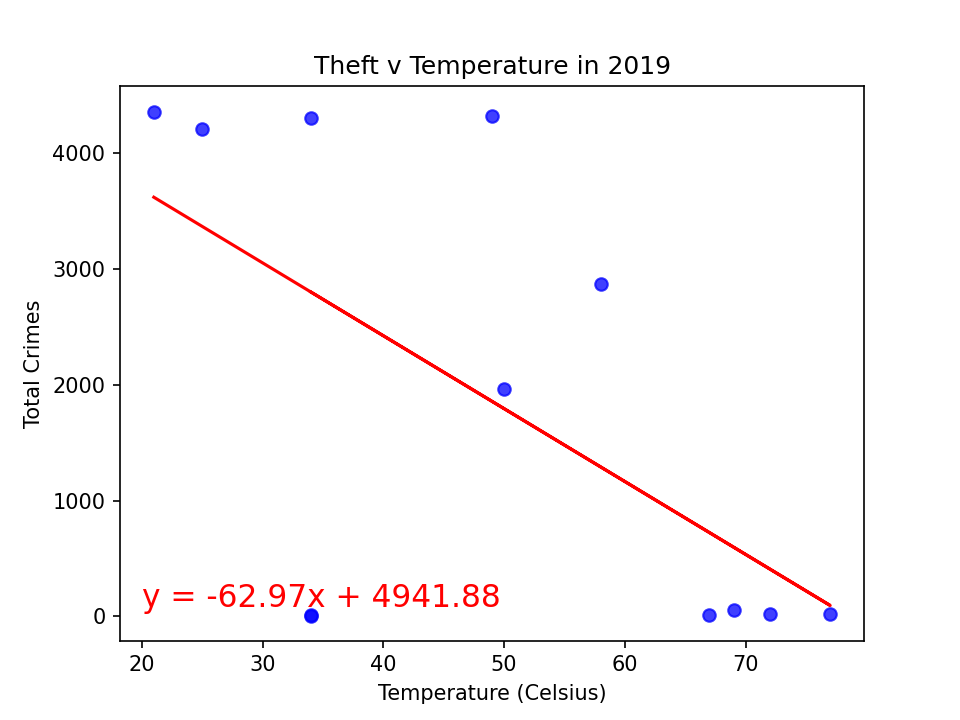

The r-squared is: 0.36487238552599566


In [235]:
temp = crime_temp["Temperature"]
theft = crime_temp["Theft"]
battery_crimes = crime_temp["Battery Crimes"]
criminal_damage = crime_temp["Criminal Damage"]

plt.scatter(temp, theft, marker="o", facecolors="b", alpha=.75)
#plt.scatter(temp, battery_crimes, marker="o", facecolors="r", alpha=.75)
#plt.scatter(temp, criminal_damage, marker="o", facecolors="g", alpha=.75)

plt.title("Theft v Temperature in 2019")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Total Crimes")


(slope, intercept, rvalue, pvalue, stderr) = linregress(temp, theft)
regress_values = temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(temp,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()



plt.savefig("Theft v Temperature in 2019.png")

In [230]:
correlation = st.pearsonr(temp,theft)

print(f"The correlation between both factors is {round(correlation[1],2)}")

The correlation between both factors is 0.04


In [231]:
correlation = st.pearsonr(temp,battery_crimes)

print(f"The correlation between both factors is {round(correlation[1],3)}")

The correlation between both factors is 0.055


In [232]:
correlation = st.pearsonr(temp,criminal_damage)

print(f"The correlation between both factors is {round(correlation[1],3)}")

The correlation between both factors is 0.056
